In [1]:
import pandas as pd

In [3]:
data = pd.read_csv("data/GOOGL.csv")
data["Date"] = data.index #인덱스화
data.reset_index(drop=True, inplace=True) #인덱스화 해놓고서 리셋해버리면 그냥 저게 01234로 치환된다 - 시계열 순차가 되어있는것이므로 그 순서에 따른 걸 알고자 하는데는 문제 없음
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253 entries, 0 to 252
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       253 non-null    int64  
 1   Open       253 non-null    float64
 2   High       253 non-null    float64
 3   Low        253 non-null    float64
 4   Close      253 non-null    float64
 5   Adj Close  253 non-null    float64
 6   Volume     253 non-null    int64  
dtypes: float64(5), int64(2)
memory usage: 14.0 KB


In [4]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,0,1292.000000,1294.099976,1265.060059,1270.859985,1270.859985,2209300
1,1,1283.199951,1284.760010,1230.380005,1232.589966,1232.589966,4035000
2,2,1345.000000,1360.150024,1326.729980,1342.180054,1342.180054,5417900
3,3,1331.359985,1350.000000,1321.500000,1346.699951,1346.699951,2792100
4,4,1324.089966,1351.430054,1309.660034,1317.319946,1317.319946,2443600


In [6]:
data = data[["Date", "Close"]]
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253 entries, 0 to 252
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    253 non-null    int64  
 1   Close   253 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 4.1 KB


In [7]:
import matplotlib.pyplot as plt

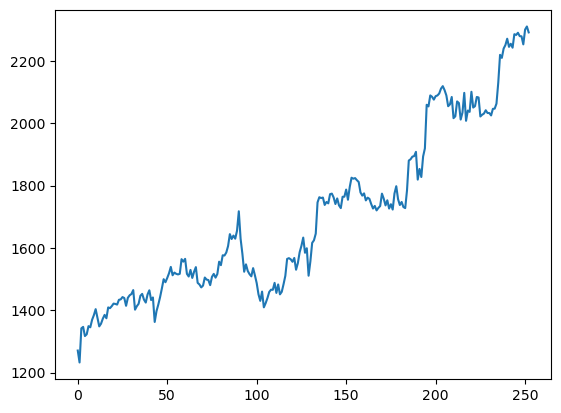

In [8]:
plt.plot(data["Date"], data["Close"])

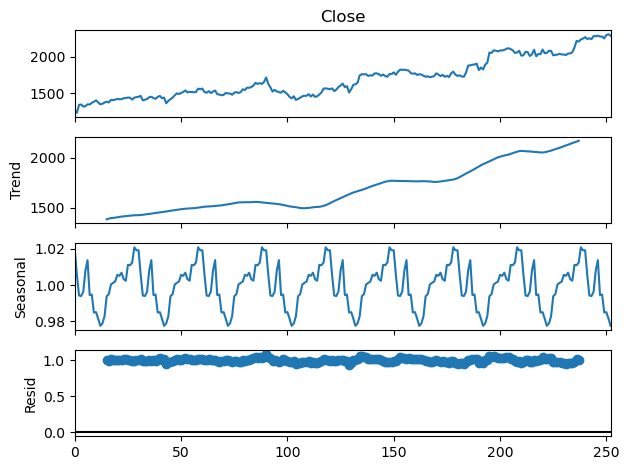

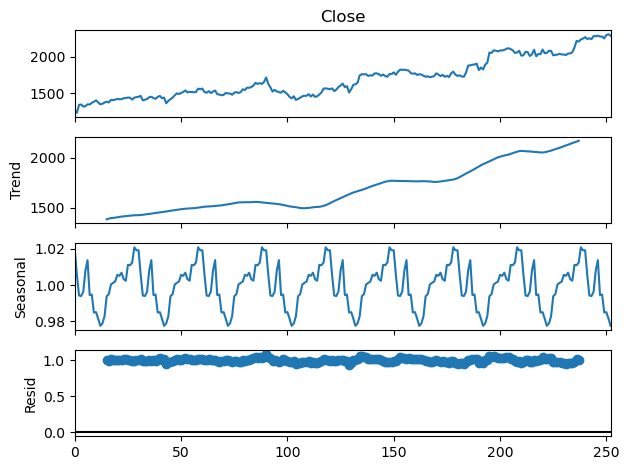

In [12]:
from statsmodels.tsa.seasonal import seasonal_decompose #분해
result = seasonal_decompose(data["Close"], model='multiplicative', period=30) #30일, 월별
result.plot()

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

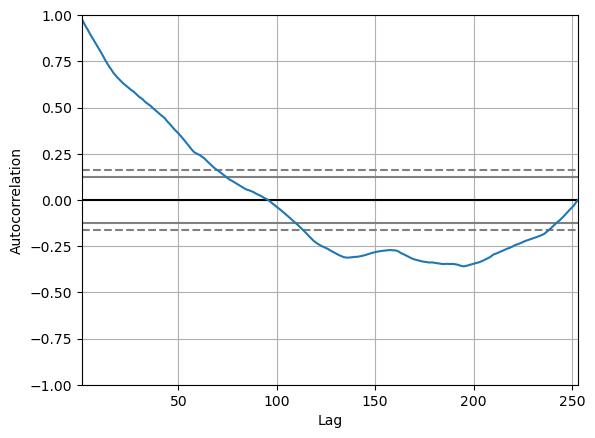

In [13]:
#데이터의 정상성 확인 위하여, 저 실선 안에 있는 lag 70-100부분 쟤만 정상적이라고 보면 된다함
pd.plotting.autocorrelation_plot(data["Close"])

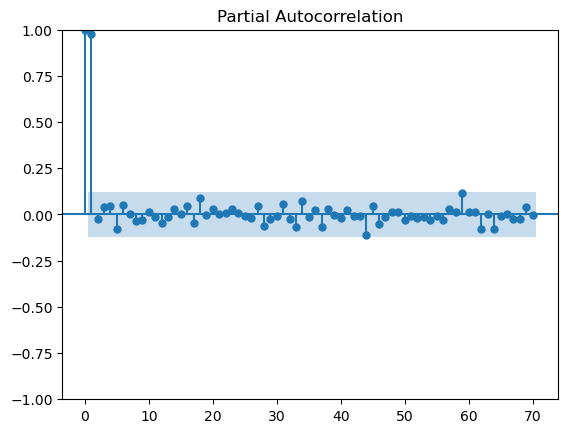

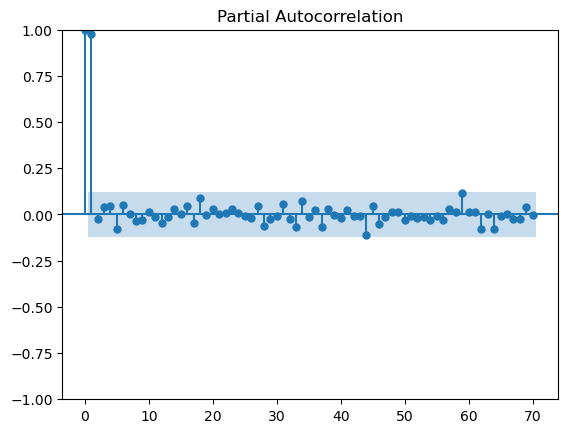

In [14]:
from statsmodels.graphics.tsaplots import plot_pacf

plot_pacf(data["Close"], lags=70)
#정상성 있는 데이터로 간주하고 전처리 안할거야

In [29]:
p , d , q = 5, 1, 2
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(data["Close"], order=(p, d, q))
fitted_model=model.fit()
predicts = fitted_model.predict() #모델의 예측값 모아보기
predicts = fitted_model.predict(len(data), len(data)+10) #predict () 범위 지정! ***뒷부분을 위하여 10개 더 붙여야 함 ***

In [30]:
predicts

253    2289.338554
254    2295.209371
255    2289.088297
256    2281.176607
257    2285.965150
258    2291.601874
259    2289.031316
260    2286.252375
261    2288.803133
262    2290.229473
263    2288.036409
Name: predicted_mean, dtype: float64

<Axes: >

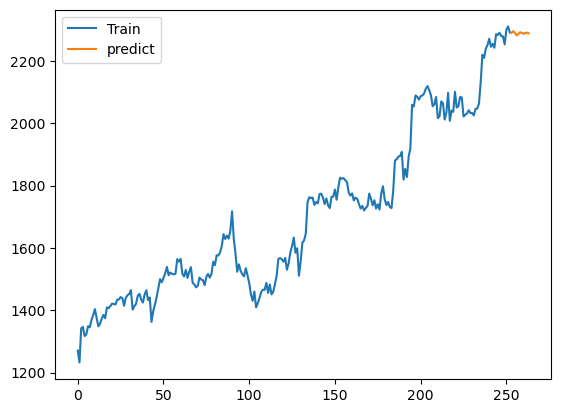

In [26]:
data["Close"].plot(legend=True, label="Train")
predicts.plot(legend=True, label="predict")

C:\Users\user\anaconda3\envs\torch-book\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\user\anaconda3\envs\torch-book\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\user\anaconda3\envs\torch-book\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<Axes: >

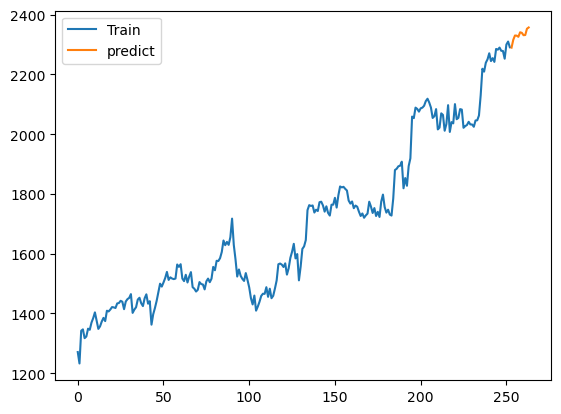

In [32]:
import statsmodels.api as sm

model = sm.tsa.statespace.SARIMAX(
    data["Close"], order = (p, d, q), seasonal_order = (p, d, q, 12)) #SARIMAX의 seasonal을 좀더 강화하는 옵션, 12로 1년단위로 보겠다
fitted_model=model.fit()
predicts = fitted_model.predict(len(data), len(data)+10)
data["Close"].plot(legend=True, label="Train")
predicts.plot(legend=True, label="predict")

## LSTM

* LSTM의 input_size : the number of expected features
* num_layers = the number of recurrent layers.